In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if (True):
  import os
  #os.chdir("drive/My Drive/")  # Go to your Gdrive directory

## Field Animation

Uses a sequence of images to create a gif

In [ ]:
### GIF GENERATOR ### 
import imageio

filenames = [] # empty list for filenames

# frames between transitions
n_frames = 101 # number of static images
step_size = 2 # Jump some frames

# Build graph
for i in range(0,n_frames,step_size):

    # append the sequential file names to a list
    filename = f'darcy-two-phase_output/two-phase.{i:04d}.png' # .png images already generated using save animation from Paraview
    filenames.append(filename)
    
    # last frame of each viz stays longer
    if (i == n_frames-1):
        for x in range(10): # Hold the last image during X frames
            filenames.append(filename)

# build gif
with imageio.get_writer('darcy-two-zones_gif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    print("----DONE----/n")
        

----DONE----/n


## Display Gif

In [ ]:
# Include a Text Cell in Google Colab Notebook
#![](https://raw.githubusercontent.com/mfdali/two-phase-flow/main/fenics/darcy-two-zones_gif.gif)

![](https://raw.githubusercontent.com/mfdali/two-phase-flow/main/fenics/darcy-two-zones_gif.gif)

##Graph animation

Load a datafile to draw a graph and export gif

In [5]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

In [7]:
# Load database with pandas
saturation_front = pd.read_csv('saturation-time_darcy-two-phase.txt', sep=',',names=[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,0.00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.49,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.59,1.700000e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.64,1.100000e-03,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.68,6.900000e-02,5.400000e-113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x_list = saturation_front.columns

<Figure size 1000x400 with 0 Axes>

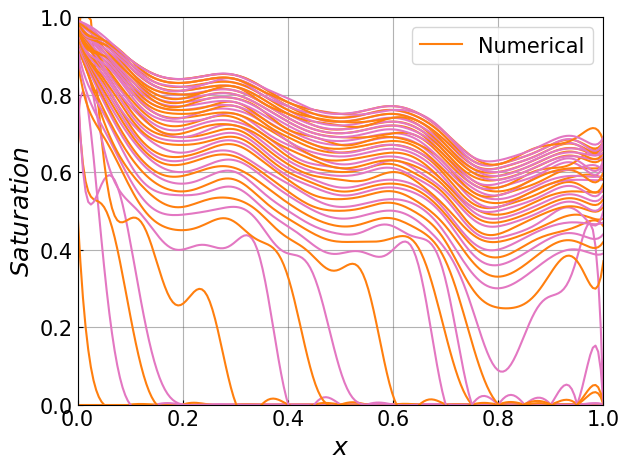

In [27]:
#### GRAPH ####
from scipy.interpolate import make_interp_spline, BSpline

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x_list.min(), x_list.max(), 200) 

# Create Figure with Matplotlib
plt.figure(figsize=[10,4])
fig, ax = plt.subplots()

# Plot the first series to insert the legend
#define spline with degree k=7
y = saturation_front.iloc[0,:]
spl = make_interp_spline(x_list, y, k=7)
y_smooth = spl(xnew)
y_smooth[y_smooth > 1.0] = 1.0
ax.plot(xnew, y_smooth, '-', markersize=5, color='C1', label="Numerical")

# Plot the rest of data
step_size = 5 # Jump some timesteps
for i in range(1,len(saturation_front),step_size):
  y = saturation_front.iloc[i,:]
  #define spline with degree k=7
  spl = make_interp_spline(x_list, y, k=7)
  y_smooth = spl(xnew)
  y_smooth[y_smooth > 1.0] = 1.0
  ax.plot(xnew, y_smooth, '-', markersize=5, color='C'+str(i))
#ax.plot(temps[:],(p_anat[:,0])/1000,'s', markersize=6, markeredgecolor='k', color='None', markeredgewidth=1.5, label='Analytical')
#ax.plot((ptime[:]), (ux[:])*1000,  linestyle='solid', color='k', linewidth=1, label='Analytical')

# Label the axis
ax.set_xlabel("$x$", fontsize = 18)
ax.set_ylabel("$Saturation$", fontsize = 18)
ax.set_xlim(0,1.0) #xaxis range
ax.set_ylim(0,1.0) #yaxis range

# Graph settings
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)

# Show the minor grid lines with very faint and almost transparent grey lines
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#606060', linestyle='-', alpha=0.2)
#ax.grid(True)
ax.legend(loc=1)
plt.style.use('default')
#plt.style.use('classic')
#plt.rcParams['text.usetex'] = True
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#plt.legend(title="Time(s)", bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox=True)

# Save one static graph (Optional)
#plt.savefig("terzaghi_mono_ptime.png")

In [38]:
### GIF GENERATOR ### 
## Terzaghi Monolithic
from scipy.interpolate import make_interp_spline, BSpline

filenames = [] # empty list for filenames

# frames between transitions
n_frames = 161 # number of static images

# Build the sequence of graphs
for i in range(0,n_frames):
    step_size = 4 # Jump some timesteps
    len_gif = i # Controls the number of points to be drawn at each new image

    # Create Figure with Matplotlib
    plt.figure(figsize=[10,4])
    fig, ax = plt.subplots()
    
    # Plot the old timestep curves
    for j in range(0,len_gif-step_size,step_size): # Draw the points until the frame number
        y = saturation_front.iloc[j,:]
        ## draw smooth curve
        #define spline with degree k=7
        spl = make_interp_spline(x_list, y, k=7)
        y_smooth = spl(xnew)
        y_smooth[y_smooth > 1.0] = 1.0
        y_smooth[y_smooth < 0.0] = 0.0
        ax.plot(xnew, y_smooth, '-', markersize=5, color='silver')
    
    # Draw the current timestep
    y = saturation_front.iloc[len_gif,:]
    ## draw smooth curve
    #define spline with degree k=7
    spl = make_interp_spline(x_list, y, k=7)
    y_smooth = spl(xnew)
    y_smooth[y_smooth > 1.0] = 1.0
    y_smooth[y_smooth < 0.0] = 0.0
    ax.plot(xnew, y_smooth, '-', markersize=5, color='C0')

    # Label the axis
    ax.set_xlabel("$x$", fontsize = 18)
    ax.set_ylabel("Saturation $S_w$", fontsize = 18)
    ax.set_xlim(0,1.0) #xaxis range
    ax.set_ylim(0,1.0) #yaxis range

    # Graph settings
    # Show the major grid lines with dark grey lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)

    # Show the minor grid lines with very faint and almost transparent grey lines
    #plt.minorticks_on()
    #plt.grid(b=True, which='minor', color='#606060', linestyle='-', alpha=0.2)
    #ax.grid(True)
    ax.legend(loc=1)
    plt.style.use('default')
    #plt.style.use('classic')
    #plt.rcParams['text.usetex'] = True
    fig.patch.set_facecolor('xkcd:white')
    fig.tight_layout()
    plt.rcParams['font.size'] = 15
    plt.rcParams['legend.fontsize'] = 15
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    #plt.legend(title="Time(s)", bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox=True)
    
    # Create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # If it is the last frame, repeat it to stay longer
    if (i == n_frames-1):
        for x in range(10): # Hold the last image during X frames
            filenames.append(filename)

    # Save frame
    plt.savefig(filename)
    plt.close()

# build gif
with imageio.get_writer('sat_front_gif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
      
# Remove files
for filename in set(filenames):
    os.remove(filename)

<ipython-input-38-926ec6f72968>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-38-926ec6f72968>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,4])
<ipython-input-38-926ec6f72968>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<i

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [39]:
# Display GIF from GitHub in Jupyter, CoLab, IPython
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mfdali/two-phase-flow/main/fenics/sat_front_gif.gif')

## Graph Motion

Load datafile, draw one point per timestep on graph and export gif

In [ ]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio

In [ ]:
# Importando a base de dados
terzaghi_mono = pd.read_csv('biot-td-monolithic_terzaghi_p_cte_x_dataterzaghi1000000.0_time.txt', sep=',')

In [ ]:
lin,col = terzaghi_mono.shape
ini = lin-(6000/0.1)-1
mono = terzaghi_mono.loc[ini:,:].reset_index()
len,col = mono.shape
mono['Time-step'] = pd.to_numeric(mono['Time-step'])
mono['Pbottom'] = pd.to_numeric(mono['Pbottom'], downcast='float')

<Figure size 1000x400 with 0 Axes>

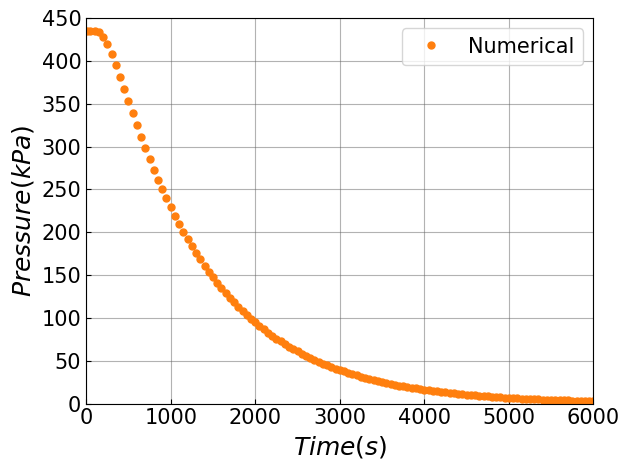

In [ ]:
# Flow Rate $k=10^{-11} m^2 \ E=5x10^{7} Pa$
plt.figure(figsize=[10,4])
cont = 1
fig, ax = plt.subplots()
ax.plot(mono.iloc[100,1], (mono.iloc[100,7])/1000, 'o', markersize=5, color='C1', label="Numerical")
for i in range(500,len,500):
  cont+=1
  ax.plot(mono.iloc[i,1], mono.iloc[i,7]/1000, 'o', markersize=5, color='C1')
#ax.plot(temps[:],(p_anat[:,0])/1000,'s', markersize=6, markeredgecolor='k', color='None', markeredgewidth=1.5, label='Analytical')
#ax.plot((ptime[:]), (ux[:])*1000,  linestyle='solid', color='k', linewidth=1, label='Analytical')
ax.set_xlabel("$Time (s)$", fontsize = 18)
ax.set_ylabel("$Pressure (kPa)$", fontsize = 18)
ax.set_xlim(0,6000)
ax.set_ylim(0,450)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)

# Show the minor grid lines with very faint and almost transparent grey lines
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#606060', linestyle='-', alpha=0.2)
#ax.grid(True)
ax.legend(loc=1)
plt.style.use('default')
#plt.style.use('classic')
#plt.rcParams['text.usetex'] = True
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
#plt.legend(title="Time(s)", bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox=True)
#plt.savefig("terzaghi_mono_ptime.png")

In [ ]:
### GIF GENERATOR ### 
## Terzaghi Monolithic

filenames = [] # empty list for filenames

# frames between transitions
n_frames = 121 # number of static images

# Build graph
for i in range(0,n_frames):
    step_size = 500 # Jump some data points
    len_gif = step_size*i # Controls the number of points to be drawn

    plt.figure(figsize=[10,4])
    fig, ax = plt.subplots()
    ax.plot(mono.iloc[100,1], (mono.iloc[100,7])/1000, 'o', markersize=5, color='C1', label="Numerical")
    for j in range(500,len_gif,500): # Draw the points until the frame number
      ax.plot(mono.iloc[j,1], mono.iloc[j,7]/1000, 'o', markersize=5, color='C1')
    
    ax.set_xlabel("$Time (s)$", fontsize = 18)
    ax.set_ylabel("$Pressure (kPa)$", fontsize = 18)
    ax.set_xlim(0,6000)
    ax.set_ylim(0,450)
    # Show the major grid lines with dark grey lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.5)

    # Show the minor grid lines with very faint and almost transparent grey lines
    #plt.minorticks_on()
    #plt.grid(b=True, which='minor', color='#606060', linestyle='-', alpha=0.2)
    #ax.grid(True)
    ax.legend(loc=1)
    plt.style.use('default')
    #plt.style.use('classic')
    #plt.rcParams['text.usetex'] = True
    fig.patch.set_facecolor('xkcd:white')
    fig.tight_layout()
    plt.rcParams['font.size'] = 15
    plt.rcParams['legend.fontsize'] = 15
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    #plt.legend(title="Time(s)", bbox_to_anchor=(1.05, 1.0), loc='upper left', fancybox=True)
    
    # Create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # last frame of each viz stays longer
    if (i == n_frames-1):

        for x in range(10): # Hold the last image during X frames
            filenames.append(filename)

    # save frame
    plt.savefig(filename)
    plt.close()

# build gif
with imageio.get_writer('terzaghi_gif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

        
# Remove files
for filename in set(filenames):
    os.remove(filename)

<ipython-input-44-10fea516f9ee>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<ipython-input-44-10fea516f9ee>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,4])
<ipython-input-44-10fea516f9ee>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
<i

----DONE----/n


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

## Display Gif

In [ ]:
# Display GIF in Jupyter, CoLab, IPython
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/mfdali/two-phase-flow/main/fenics/terzaghi_gif.gif')